In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import pandas as pd
import os

In [7]:
DATA_FOLDER = 'dataset'
COMPLETE_DATA = os.path.join(DATA_FOLDER, 'complete_dataset.csv')
INTERMEDIATE_DATA = os.path.join(DATA_FOLDER, 'intermediate_dataset.csv')
DATASET = os.path.join(DATA_FOLDER, 'preprocessed_df.csv')

from pandas.core.dtypes.common import is_numeric_dtype
df = pd.read_csv(COMPLETE_DATA)
numerical_attr_list = [col for col in df.columns if is_numeric_dtype(df[col])]

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import cohen_kappa_score

test_train = 0.1
train_labels = df.emotion.values[:int(len(df)*(1-test_train))]
test_labels = df.emotion.values[int(len(df)*(1-test_train)):]
train_data = df[numerical_attr_list].values[:int(len(df)*(1-test_train)),:]
test_data = df[numerical_attr_list].values[int(len(df)*(1-test_train)):, :]

knn = KNeighborsClassifier(n_neighbors=10)

u = knn.fit(train_data, train_labels)
cohen_kappa_score( test_labels, u.predict(test_data) )

0.13620929155733918

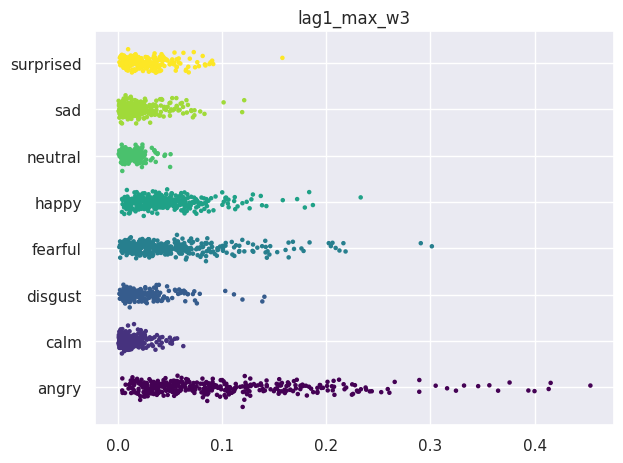

In [14]:
df_ami = pd.read_csv(os.path.join(DATA_FOLDER, "df_ami.csv"))
enc = OneHotEncoder()
labels_dict = {emo:val for val, emo in enumerate(np.unique(df.emotion.values))}
labels = list(map(labels_dict.get, df.emotion.values))
best_emo_predictors = df_ami[df_ami.cat == "emotion"].sort_values("ami", ascending=False).reset_index()[ "num"]

num = best_emo_predictors[5]
plt.scatter(df[num], labels + np.random.normal(0,0.1,size=len(df)), label=best_emo_predictors, c=labels, s= 5, cmap="viridis")
plt.yticks(range(len(labels_dict)), labels=labels_dict.keys());
plt.title(num);